# CS 506 HW1 Solution
Name:
<input readonly="readonly" value="Zhenghang Yin" />

Student Id:
<input readonly="readonly" value="U82871437" />

### 1. Understandking K-means Clustering

(Please fill out the functions in k_means_clustering.py)

### 2. Working with the Algorithms

In [5]:
from typing import List, Dict, Tuple
# feel free to add more functions such as discard missing examples

def read_dataset(dataset_path: str):
    """
    read in NYC dataset and return a dataset type of your choice
    :param dataset_path: the string path to the dataset file
    :return: dataset
    """


def cluster_nyc_listings():
    """
    cluster AirBnb listings using k-means++, hierarchical, and GMM
    :return: 
    """
    pass

### 2b List a few bullet points describing the pros and cons of the various clustering algorithms.

### 3 Data Visualization
### 3a Produce a Heatmap. Is this heatmap useful in order to draw conclusions about the expensiveness of areas within NYC? if not, why?

In [6]:
import folium

def generate_base_map(default_location: Tuple[float, float]=[40.693943, -73.985880]):
    base_map = folium.Map(location=default_location)
    return base_map
                      
base_map = generate_base_map()
HeatMap(
    data=df[["latitude", "longitude", "price"]]
    .groupby(["latitude", "longitude"])
    .mean()
    .reset_index()
    .values.tolist(),
    radius=8,
    max_zoom=13,
).add_to(base_map)
base_map.save("index.html")
                      

ModuleNotFoundError: No module named 'folium'

### 3b Visualize the clusters by plotting the longitude / lattitude of every listings in a scatter plot

In [ ]:
def visualize_clusters():
    pass

### 3c For every cluster, report the average price of the listings within this cluster

### 3d Bonus point (provide a plot on an actual NYC map)

### 3e Are the findings in agreement with what you have in mind about the cost of living for neighborhoods in NYC? If you are unfamiliar with NYC, you can consult the web.

### 4. Image Manipulation

In [3]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from matplotlib import pyplot
%matplotlib inline


def display_image(image: np.ndarray, title: str="图片窗口"):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyWindow(title)
    cv2.waitKey(1)

    
def cluster_image(image_path: str, k: int=2, iter_num: int=10, silent: bool=False) -> np.ndarray:
    # read in image
    img = cv2.imread(image_path)
    if not silent:
        display_image(img, image_path)
    
    img_size = img.shape
    # k means cluster image and reassign pixel value
    img = np.reshape(img, (-1, 3))

    kmeans = KMeans(init = 'k-means++', n_clusters=k, n_init=iter_num)
    kmeans.fit_predict(img)

    centroids = kmeans.cluster_centers_.astype(np.uint8)
    labels = kmeans.labels_
    new_img = centroids[labels]
    new_img = np.reshape(new_img, img_size)

    # display image
    if not silent:
        display_image(new_img, f"Indexed color={k}: {image_path}")
    return new_img

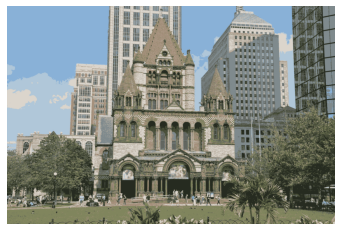

In [19]:
from PIL import Image

clustered = cluster_image('test.jpg', k=10, iter_num=30)
clustered = cv2.cvtColor(clustered, cv2.COLOR_BGR2RGB)

pyplot.axis('off')
pyplot.imshow(clustered)


In [5]:
from tqdm import tqdm
from PIL import Image

In [ ]:
for k in tqdm(range(17,257)):
    clustered = cluster_image('xt.jpeg', k, iter_num=10, silent=True)
    clustered = cv2.cvtColor(clustered, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(clustered)
    im.save(f"xt{k}.png")